# Hugging Face sentiment score calulator 

HF
Transformers is a library released by huggingface. This library downloads pretrained models for Natural Language Understanding (NLU) tasks, such as analyzing the sentiment of a text, and Natural Language Generation (NLG), such as completing a prompt with new text or translating in another language.

We'll use the pretrained model find out the sentiment of a tweet in our dataset

Pros:

Good Accuracy
Very short and easy to use code
No fancy preprocessing needed
No finicking around with threshold values
Cons:

Significantly Slower
Only works with 2 classes out of the box

In [1]:
!pip install -q transformers

     |████████████████████████████████| 2.6 MB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 45.7 MB/s 
     |████████████████████████████████| 636 kB 70.7 MB/s 
     |████████████████████████████████| 895 kB 56.1 MB/s 


In [2]:
from transformers import pipeline

In [3]:
senti_pipeline = pipeline("sentiment-analysis")

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [4]:
a = senti_pipeline("i am not happy")
if a[0]['label'] == 'NEGATIVE':
  a[0]['score'] = (-1 * a[0]['score'])
else:
  a[0]['score'] = a[0]['score']


a[0]['score']


-0.9997896552085876

# Tweet data

In [7]:
import pandas as pd
from tqdm import tnrange, tqdm_notebook, tqdm

df_clean = pd.read_csv('bitcoincash_tweets_clean.csv')

df_clean.head(2)

,ID,Text,UserName,UserFollowerCount,RetweetCount,Likes,CreatedAt
0,1424351299433230341,"RT : Elate Token is LIVEClaim 50,000 ELATE ($1...",Mimah,5,1923,0,Sun Aug 08 12:46:27 +0000 2021
1,1424350925360144389,"RT : Ripple/XRP-Fidelity,Standard Chartered,US...",CryptoJonez #tel #Csc,274,9,0,Sun Aug 08 12:44:58 +0000 2021


In [8]:
df_clean = df_clean.sort_values(by='ID') # the bigger the ID, the most recent the tweet 

In [9]:
df_clean.columns

Index(['ID', 'Text', 'UserName', 'UserFollowerCount', 'RetweetCount', 'Likes',
       'CreatedAt'],
      dtype='object')

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16406 entries, 16405 to 0
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 16406 non-null  int64 
 1   Text               16406 non-null  object
 2   UserName           16405 non-null  object
 3   UserFollowerCount  16406 non-null  int64 
 4   RetweetCount       16406 non-null  int64 
 5   Likes              16406 non-null  int64 
 6   CreatedAt          16406 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.0+ MB


In [11]:
df_clean.describe()

,ID,UserFollowerCount,RetweetCount,Likes
count,1.640600e+04,1.640600e+04,16406.000000,16406.000000
mean,1.423171e+18,2.809717e+03,381.323845,1.336950
std,9.202119e+14,2.772728e+04,705.753679,20.238528
min,1.421450e+18,0.000000e+00,0.000000,0.000000
25%,1.422259e+18,1.400000e+01,0.000000,0.000000
50%,1.423539e+18,1.000000e+02,3.000000,0.000000
75%,1.423994e+18,6.530000e+02,200.000000,0.000000
max,1.424351e+18,1.597777e+06,8245.000000,1710.000000


In [12]:
#print the dattypes for each variable
df_clean.dtypes

ID                    int64
Text                 object
UserName             object
UserFollowerCount     int64
RetweetCount          int64
Likes                 int64
CreatedAt            object
dtype: object

In [13]:
#check for NaN in entire dataframe

df_clean.isnull().values.any()

True

In [14]:
# count the NaN values

df_clean.isnull().sum().sum()

1

In [15]:
#drop the NaN value rowa
df_clean = df_clean.dropna()

In [16]:
#size of data frame after dropping the NaN values
df_clean.shape

(16405, 7)

In [17]:
# Drop duplicate tweets
print('tweet shape before droping duplicates', df_clean.shape)
duplicates_removed = df_clean.shape[0]
df_clean = df_clean.drop_duplicates(subset=['ID'])
duplicates_removed -= df_clean.shape[0]
print('tweet shape after droping duplicates', df_clean.shape)
print('duplicates removed', duplicates_removed)

tweet shape before droping duplicates (16405, 7)
tweet shape after droping duplicates (16216, 7)
duplicates removed 189


In [18]:
compound = []
for i,s in enumerate(tqdm(df_clean['Text'].values.tolist())):
    vs = senti_pipeline(s)
    if vs[0]['label'] == 'NEGATIVE':
      vs[0]['score'] = (-1 * vs[0]['score'])
    else:
      vs[0]['score'] = vs[0]['score']
    compound.append(vs[0]['score'])
df_clean["compound"] = compound
df_clean.head(2)

100%|██████████| 16216/16216 [30:59<00:00,  8.72it/s]


,ID,Text,UserName,UserFollowerCount,RetweetCount,Likes,CreatedAt,compound
16405,1421449508051820548,Bella Protocol BEL 4x Long ( 14% profit booke...,Live Day Trader,692,0,0,Sat Jul 31 12:35:46 +0000 2021,-0.996582
16403,1421449799845482499,"""Data further suggests that crypto ATMs are be...",Brock Pierce,71773,4,27,Sat Jul 31 12:36:56 +0000 2021,-0.995380


In [19]:
df_clean.tail(3)

,ID,Text,UserName,UserFollowerCount,RetweetCount,Likes,CreatedAt,compound
2,1424350818493296640,Bitcoin is cash BitcoinCash /bTuR5HP8fQ,Jagadish Ayral,129,0,0,Sun Aug 08 12:44:32 +0000 2021,-0.990587
1,1424350925360144389,"RT : Ripple/XRP-Fidelity,Standard Chartered,US...",CryptoJonez #tel #Csc,274,9,0,Sun Aug 08 12:44:58 +0000 2021,-0.996851
0,1424351299433230341,"RT : Elate Token is LIVEClaim 50,000 ELATE ($1...",Mimah,5,1923,0,Sun Aug 08 12:46:27 +0000 2021,-0.984386


In [20]:
a = df_clean
a.head(2)

,ID,Text,UserName,UserFollowerCount,RetweetCount,Likes,CreatedAt,compound
16405,1421449508051820548,Bella Protocol BEL 4x Long ( 14% profit booke...,Live Day Trader,692,0,0,Sat Jul 31 12:35:46 +0000 2021,-0.996582
16403,1421449799845482499,"""Data further suggests that crypto ATMs are be...",Brock Pierce,71773,4,27,Sat Jul 31 12:36:56 +0000 2021,-0.995380


In [22]:
a.to_csv('BCH_tweetswithHscore.csv')

In [23]:
dataset = pd.read_csv('BCH_tweetswithHscore.csv')
dataset.head(2)

,Unnamed: 0,ID,Text,UserName,UserFollowerCount,RetweetCount,Likes,CreatedAt,compound
0,16405,1421449508051820548,Bella Protocol BEL 4x Long ( 14% profit booke...,Live Day Trader,692,0,0,Sat Jul 31 12:35:46 +0000 2021,-0.996582
1,16403,1421449799845482499,"""Data further suggests that crypto ATMs are be...",Brock Pierce,71773,4,27,Sat Jul 31 12:36:56 +0000 2021,-0.995380


In [24]:
scores = []
for i, s in tqdm(dataset.iterrows(), total=dataset.shape[0]):
    scores.append(s["compound"] * ((int(s["UserFollowerCount"]))) * ((int(s["Likes"])+1)) *((int(s["RetweetCount"])+1)))
dataset["score"] = scores
dataset.head(2)

100%|██████████| 16216/16216 [00:01<00:00, 10062.42it/s]


,Unnamed: 0,ID,Text,UserName,UserFollowerCount,RetweetCount,Likes,CreatedAt,compound,score
0,16405,1421449508051820548,Bella Protocol BEL 4x Long ( 14% profit booke...,Live Day Trader,692,0,0,Sat Jul 31 12:35:46 +0000 2021,-0.996582,-6.896348e+02
1,16403,1421449799845482499,"""Data further suggests that crypto ATMs are be...",Brock Pierce,71773,4,27,Sat Jul 31 12:36:56 +0000 2021,-0.995380,-1.000180e+07


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

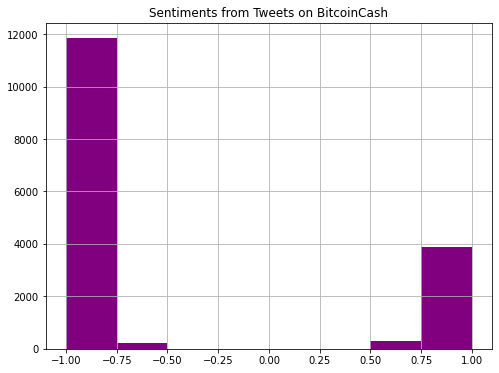

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
dataset['compound'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on BitcoinCash")
plt.show()

# Hugging face sentiment analysis 